In [1]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("../data/raw/ruddit.csv", usecols=["txt", "offensiveness_score"])
df = df.rename(columns={"txt": "comment", "offensiveness_score": "score"})

In [4]:
df.head(2)

,comment,score
0,> The difference in average earnings between m...,-0.083
1,"The myth is that the ""gap"" is entirely based o...",-0.022


In [5]:
print("---- Comentarios de apoyo ----")
[print("[Comment Score]", c[0], c[1]) for c in df.loc[df.score < -0.5].sample(n=3, random_state=2).values];

---- Comentarios de apoyo ----
[Comment Score] Queens of The Stone Age.  -0.688
[Comment Score] Thanks and good luck! You can do it!! -0.667
[Comment Score] It's not a direct comparison, you're right.  -0.63


In [6]:
print("---- Discursos de odio ----")
[print("[Comment Score]", c[0], c[1]) for c in df.loc[df.score > 0.7].sample(n=3, random_state=2).values];

---- Discursos de odio ----
[Comment Score] Nope.  If the wife gets to fuck someone else, do do you. 0.708
[Comment Score] haha, right? The fuck was his statement even thinking? "Yea, let's crush the economy just a little more!" 0.717
[Comment Score] Don’t fuck a rope. 0.708


--- Distribución de la variable objetivo (datos originales) ---


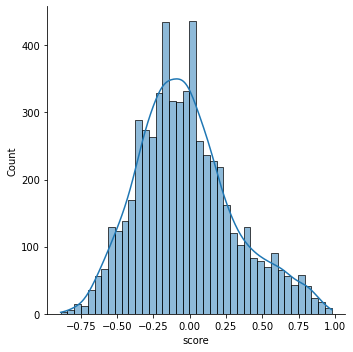

In [7]:
print("--- Distribución de la variable objetivo (datos originales) ---")
sns.displot(df.score, kde=True);

In [8]:
# Hay comentarios que ya se han borrado (Valores [deleted] or [removed])
ccount = df.comment.value_counts()
ccount[ccount > 1]

[deleted]    116
[removed]     12
Name: comment, dtype: int64